In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from adaptnn.model_fitting import MCJN05DataModel


torch.set_default_device('cuda:0')

In [5]:
model = MCJN05DataModel(dataset_params={"dtype" : torch.float32, "train_long_contrast_levels" : (0,3)})

Building multi-layer temporal convolutional model for 9 neurons and full-field stimuli.
Adding full-rank convolutional layer of size 40 and 8 channels.
Adding nonlinearity: Softplus.
Adding full-rank convolutional layer of size 12 and 8 channels.
Adding nonlinearity: Softplus.
Adding full-connected linear layer: 8 to 9.
Adding output nonlinearity: Softplus.
Model initialized.


In [6]:
model.train(100, print_every=4000, scheduler_params=None, batch_params = {"batch_size":64, "shuffle":True})

epoch 50, loss 15.00127283321283, step size 0.0001
epoch 100, loss 11.14260607509316, step size 0.0001


In [7]:
X1,Y1_0 = model.predict_rpt(1)
X2,Y2_0 = model.predict_rpt(2)
X3,Y3_0 = model.predict_rpt(3)
with torch.no_grad():
    Y1 = Y1_0.mean(dim=0).cpu().numpy()
    Y2 = Y2_0.mean(dim=0).cpu().numpy()
    Y3 = Y3_0.mean(dim=0).cpu().numpy()

    X1 = X1.cpu().numpy()
    X2 = X2.cpu().numpy()
    X3 = X3.cpu().numpy()

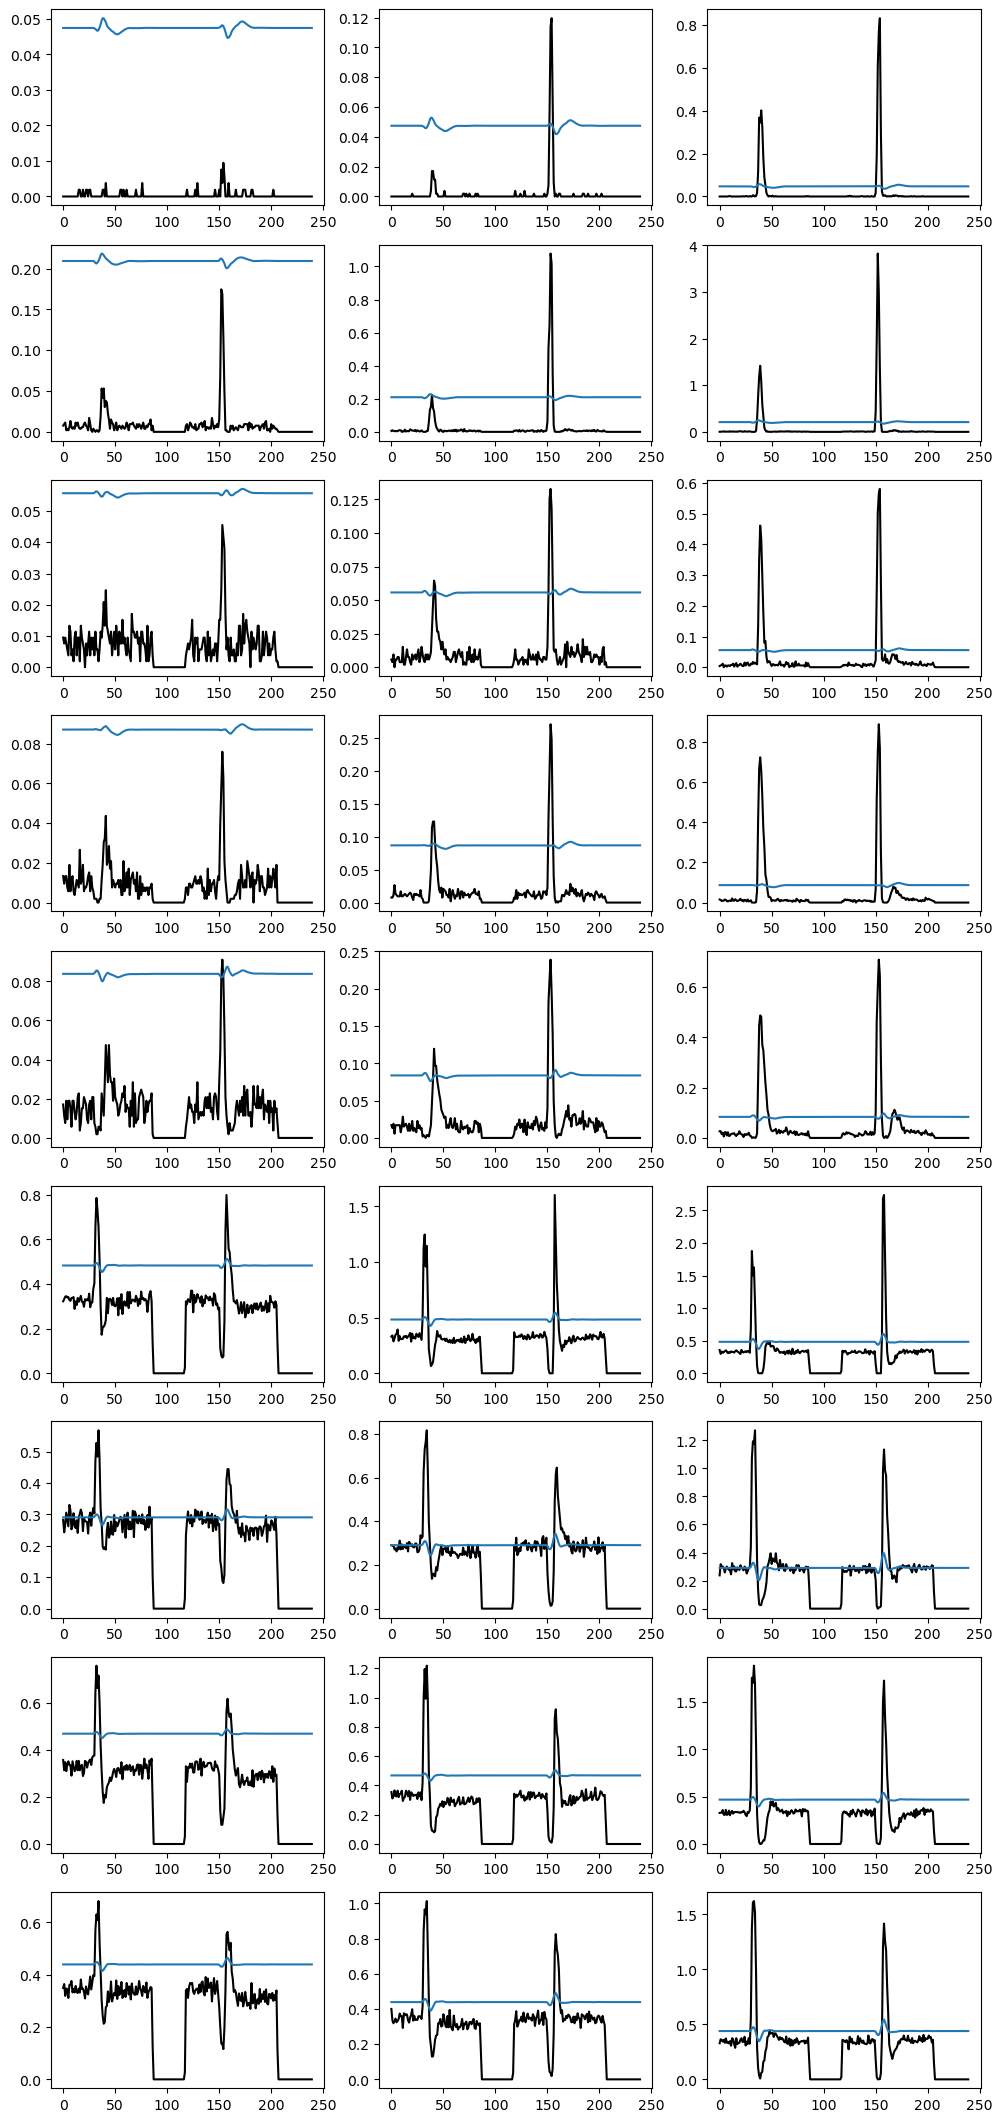

In [8]:


NC = 3
NR = 9
plt.figure(figsize=(NC*4, NR*3))

for cc in range(9):
    plt.subplot(NR,NC, cc*NC + 1)
    plt.plot(Y1[cc,:],color='black')
    plt.plot(X1[cc,:])

    plt.subplot(NR,NC, cc*NC + 2)
    plt.plot(Y2[cc,:],color='black')
    plt.plot(X2[cc,:])

    plt.subplot(NR,NC, cc*NC + 3)
    plt.plot(Y3[cc,:],color='black')
    plt.plot(X3[cc,:])

In [9]:
X = model.dataset.X_full[-1,...]
Y = model.dataset.Y_full[-1,...]

In [10]:
P = 50
T = 10000
t_0 = 1000
Ys = np.zeros((T,9))
Xs = np.ones((T,P+1))
for ii in range(T):
    Xs[ii,:P] = X[(ii-P+1+t_0):(ii+1+t_0)]
    Ys[ii,:] = Y[:,ii+t_0]

In [11]:
b,*_ = np.linalg.lstsq(Xs,Ys,rcond=None)

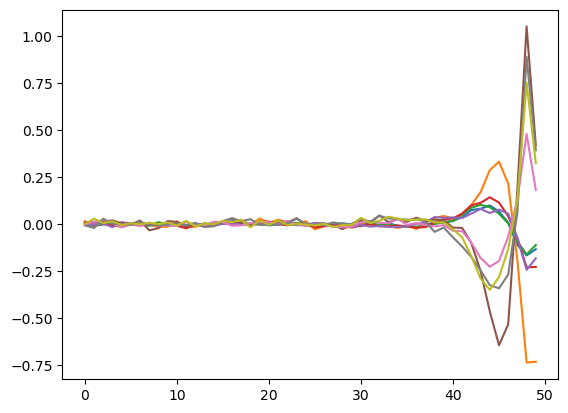

In [12]:
plt.plot(b[:-1,:]);

In [13]:
Y1.shape

(9, 240)